In [1]:
import pandas as pd

# Load the datasets
control_group = pd.read_csv('/Users/hoon/Desktop/untitled folder/control_group.csv')
test_group = pd.read_csv('/Users/hoon/Desktop/untitled folder/test_group.csv')

# Display the first few rows of each dataset to understand their structure
control_group_head = control_group.head()
test_group_head = test_group.head()

# Check the info for understanding the data types and missing values
control_group_info = control_group.info()
test_group_info = test_group.info()

(control_group_head, test_group_head, control_group_info, test_group_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase  30 non-null     object
dtypes: object(1)
memory usage: 372.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                            

(  Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
 0  Control Campaign;1.08.2019;2280;82702;56930;70...                                                                                      
 1  Control Campaign;2.08.2019;1757;121040;102513;...                                                                                      
 2  Control Campaign;3.08.2019;2343;131711;110862;...                                                                                      
 3  Control Campaign;4.08.2019;1940;72878;61235;30...                                                                                      
 4             Control Campaign;5.08.2019;1835;;;;;;;                                                                                      ,
   Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
 0  Test Campaign;1

In [2]:
# Splitting the single column into multiple columns based on the semicolon delimiter
control_group = control_group['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].str.split(';', expand=True)
test_group = test_group['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].str.split(';', expand=True)

# Renaming the columns for better understanding
columns = ['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']
control_group.columns = columns
test_group.columns = columns

# Converting data types
for col in columns[2:]:  # Skip 'Campaign Name' and 'Date' for conversion
    control_group[col] = pd.to_numeric(control_group[col], errors='coerce')
    test_group[col] = pd.to_numeric(test_group[col], errors='coerce')

# Converting 'Date' to datetime format
control_group['Date'] = pd.to_datetime(control_group['Date'], format='%d.%m.%Y')
test_group['Date'] = pd.to_datetime(test_group['Date'], format='%d.%m.%Y')

# Display the first few rows again to verify changes
(control_group.head(), test_group.head())


(      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
 0  Control Campaign 2019-08-01         2280           82702.0   56930.0   
 1  Control Campaign 2019-08-02         1757          121040.0  102513.0   
 2  Control Campaign 2019-08-03         2343          131711.0  110862.0   
 3  Control Campaign 2019-08-04         1940           72878.0   61235.0   
 4  Control Campaign 2019-08-05         1835               NaN       NaN   
 
    # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
 0               7016.0         2290.0             2159.0            1819.0   
 1               8110.0         2033.0             1841.0            1219.0   
 2               6508.0         1737.0             1549.0            1134.0   
 3               3065.0         1042.0              982.0            1183.0   
 4                  NaN            NaN                NaN               NaN   
 
    # of Purchase  
 0          618.0  
 1          511.0  
 2    

(       # of Impressions          Reach  # of Website Clicks  # of Searches  \
 count         29.000000      29.000000            29.000000      29.000000   
 mean      109559.758621   88844.931034          5320.793103    2221.310345   
 std        21688.922908   21832.349595          1757.369003     866.089368   
 min        71274.000000   42859.000000          2277.000000    1001.000000   
 25%        92029.000000   74192.000000          4085.000000    1615.000000   
 50%       113430.000000   91579.000000          5224.000000    2390.000000   
 75%       121332.000000  102479.000000          6628.000000    2711.000000   
 max       145248.000000  127852.000000          8137.000000    4891.000000   
 
        # of View Content  # of Add to Cart  # of Purchase  
 count          29.000000         29.000000      29.000000  
 mean         1943.793103       1300.000000     522.793103  
 std           777.545469        407.457973     185.028642  
 min           848.000000        442.000000

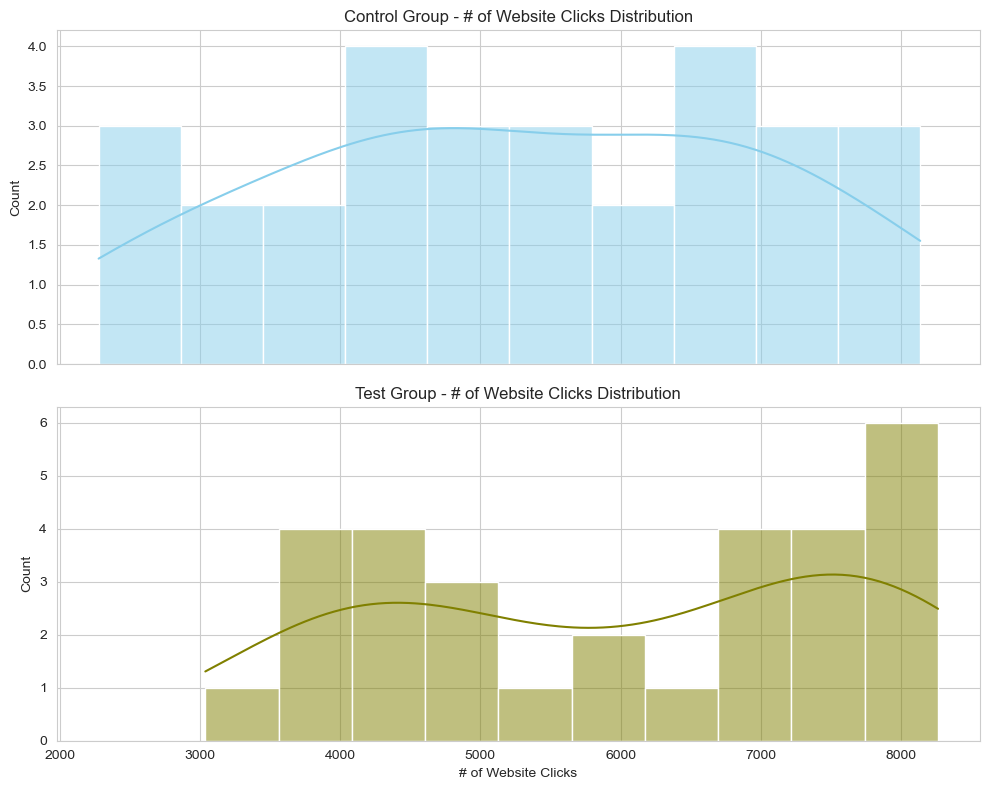

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Key metrics for comparison
metrics = ['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

# Summary statistics for control and test groups
control_summary = control_group[metrics].describe()
test_summary = test_group[metrics].describe()

# Plotting distributions for a key metric as an example
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
sns.histplot(control_group['# of Website Clicks'], bins=10, kde=True, color="skyblue", ax=ax[0])
ax[0].set_title('Control Group - # of Website Clicks Distribution')
sns.histplot(test_group['# of Website Clicks'], bins=10, kde=True, color="olive", ax=ax[1])
ax[1].set_title('Test Group - # of Website Clicks Distribution')
plt.tight_layout()

(control_summary, test_summary)


In [4]:
from scipy.stats import ttest_ind

# Perform t-tests for '# of Website Clicks' and '# of Purchase'
metrics_to_test = ['# of Website Clicks', '# of Purchase']

# Dictionary to store p-values
p_values = {}

for metric in metrics_to_test:
    control_data = control_group[metric].dropna()  # Dropping NaN values for accurate testing
    test_data = test_group[metric].dropna()
    
    # Welch's t-test for independent samples with unequal variances
    t_stat, p_val = ttest_ind(control_data, test_data, equal_var=False)
    p_values[metric] = p_val

p_values


{'# of Website Clicks': 0.12054876064243351,
 '# of Purchase': 0.9760037958073526}